#### Performing Regression on Health Insurance Data
This notebook seeks to implement regression and improve ML model accuracy through feature transformation, feature engineering, clustering, algorithm boosting, etc.

Our main objective is to predict insurance charges. We will use regression because our target variable is numeric.

In [1]:
# Importing libraries
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the dataset
df_insure = pd.read_csv("C:/Users/Nkululeko Cyril Cele/source/Machine-Learning/insurance.csv")

In [4]:
# Checking the shape of the df
print(f"Rows, columns: {df_insure.shape}\n")

# Showing the first five rows
print(df_insure.head())

Rows, columns: (1338, 7)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The dataset has 1338 rows/records, 6 features, and 1 target variable. 3 of the features (sex, smoker, region) are categorical variables and 3 others (age, bmi, children) are numerical.

### Data Cleaning

**Handling Duplicated Rows**

In [128]:
df_insure.duplicated().sum()

0

There's one duplicated row, which we will get rid of below.

In [6]:
df_insure = df_insure.drop_duplicates()
print(f"Rows, columns: {df_insure.shape}")

Rows, columns: (1337, 7)


**Handling Missing Values**

In [7]:
df_insure.isnull().values.sum()

0

In [8]:
df_insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values.

#### Checking String-Encoded Categorical Data

In [9]:
print(df_insure.sex.unique())
print(df_insure.sex.value_counts())

['female' 'male']
male      675
female    662
Name: sex, dtype: int64


In [10]:
print(df_insure.smoker.unique())
print(df_insure.smoker.value_counts())

['yes' 'no']
no     1063
yes     274
Name: smoker, dtype: int64


In [11]:
print(df_insure.region.unique())
print(df_insure.region.value_counts())

['southwest' 'southeast' 'northwest' 'northeast']
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


The sex column has two unique values, and so is the smoker column. The region column has four unique values.

**Detecting the Outliers**

In [129]:
# Displaying summary statistics for the numeric columns
df_insure.describe()

,age,bmi,children,charges
count,1330.000000,1330.000000,1330.000000,1330.000000
mean,39.200752,30.633049,1.097744,13045.345009
std,14.052396,6.091072,1.206108,11699.581595
min,18.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.220000,0.000000,4724.369462
50%,39.000000,30.302500,1.000000,9303.297725
75%,51.000000,34.600000,2.000000,16389.832412
max,64.000000,53.130000,5.000000,49577.662400


In [130]:
# Creating a class that returns lower and upper boundaries
class OutlierBoundary:
    """The class accepts one argument and returns the upper and lower boundaries.
    """
    def __init__(self, dataset):
        """Initiates the function
        """
        self.dataset = dataset

    def outlier(self):
        """The function detects the upper and lower class boundaries
        """
        
        # Creating a list of columns for which to return the upper and lower boundaries
        column_list = ["age", "bmi", "children", "charges"] 
        
        # Iterating over the list
        for column in self.dataset:
            
            # Checking whether the columns in the list are also found in the dataset
            if column in column_list:
                
                # Extracting the summary statstics
                des = self.dataset[column].describe()
                
                # Creating the dictionary that stores the summary statistics
                desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
                
                # Calculating first and third quartiles
                Q1 = des[desPairs["25"]]
                Q3 = des[desPairs["75"]]
                
                # Calculating the interquartile range
                IQR = Q3-Q1
                
                # Calculating the lower and upper boundaries
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                
                # Printing the boudaries for each column
                print(f"The upper boundary for the {column} column is {upper} and the lower boundary is {lower}.")

In [14]:
# Calling the class and importing the dataset
p = OutlierBoundary(df_insure)

In [15]:
# Printing the boundaries for our target columns
p.outlier()

The upper boundary for the age column is 87.0 and the lower boundary is -9.0.
The upper boundary for the bmi column is 47.31500000000001 and the lower boundary is 13.674999999999994.
The upper boundary for the children column is 5.0 and the lower boundary is -3.0.
The upper boundary for the charges column is 34524.777625 and the lower boundary is -13120.716174999998.


In [131]:
# Printing the estimate of the potential outliers
print("The total number of outliers that can be removed is:",
      len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72]))

# Printing the percentage estimate of the outliers
print("This is about", ((len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72])) / 1337) * 100, "% of the dataset.")

The total number of outliers that can be removed is: 140
This is about 10.471204188481675 % of the dataset.


About 11.07% of our dataset is is outliers. We will investigate these further below to check whether it makes sense to delete the outliers or keep them.

### Data Visualisation

In [17]:
# Importing matplotlib and seaborn to sketch our graphs
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

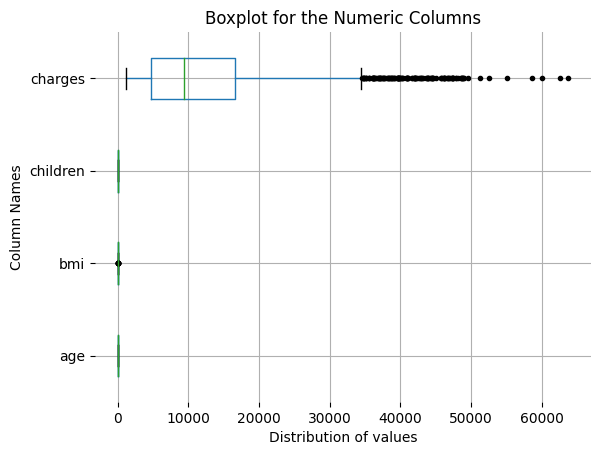

In [18]:
# Drawing boxplots for our numeric dataset, including our output variable
df_insure.boxplot(column= ["age", "bmi", "children", "charges"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

First thing of note here is that the charges column has a higher median than the rest of the columns. Also, the outliers in this column reveal that there's deep activity beyond our maximum value. This compels us to keep the outliers. However, we can remove the values that are above 50000 as they seem like they are rare values.

Secondly, We cannot clearly discern the distribution of children, bmi, and age. Thus, we will draw another chart that excludes the charges column.

In [132]:
# Checking how many values in the charges column are above 50000
len(df_insure[df_insure["charges"] > 50000])

0

In [20]:
# Displaying the rows that are above 50000
df_insure[df_insure["charges"] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [21]:
# Filtering the seven columns
df_insure = df_insure[df_insure["charges"] <= 50000]
print(df_insure.shape,"\n")

# Checking the first five rows
print(df_insure.head())


(1330, 7) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [22]:
# Checking the last five rows
df_insure.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


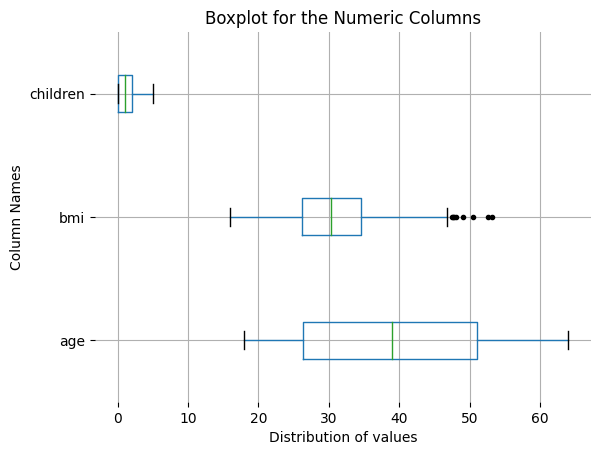

In [23]:
# Sketching boxplots for our numeric columns, excluding the charges column
df_insure.boxplot(column= ["age", "bmi", "children"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

This is much better, but we still can't discern the children column. Here, we can see that the age column has a higher median than the other two columns. We will not be removing BMI indices above 47 since the distribution of the column seems to rather resemble Gaussian distribution.

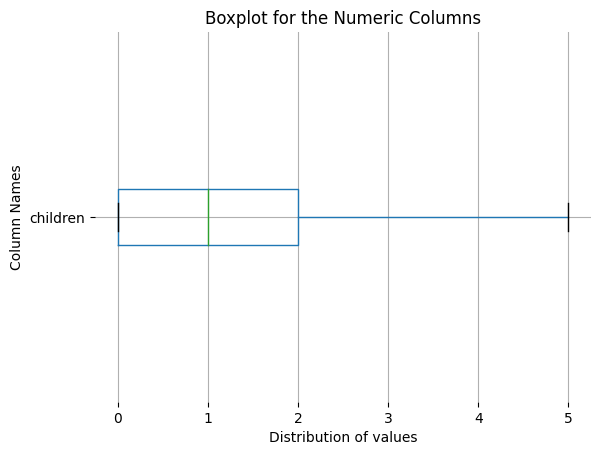

In [24]:
# Viewing the boxplot for the children column
df_insure.boxplot(column= ["children"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

Now we can clearly see the distribution of the children column, which has a median of 1. Both the Q1 and the minimum value are equal to zero.

Below we plot the scatter plot matrix to check correlations and get more insights from our data.

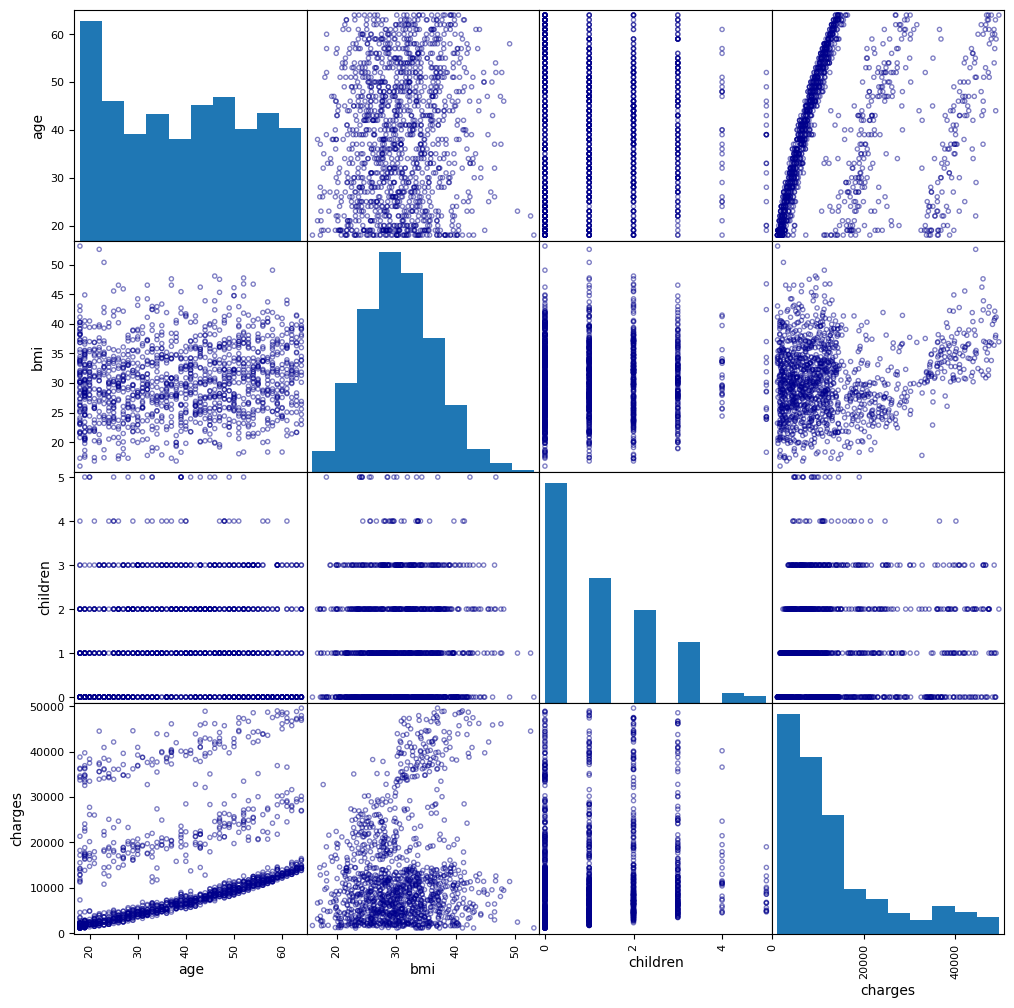

In [25]:
# Sketching the scatter plot matrix
_ = pd.plotting.scatter_matrix(df_insure, figsize = (12,12), c = "none", edgecolor = "darkblue")

This gives us a vivid picture of correlations and distributions of variables. The distributions of charges and children are positively skewed. From what we can tell, the distribution of the bmi column is symbolic of the Gaussian distribution, and there is a correlation between the age and the charges columns.

We can also look at distributions without correlations.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

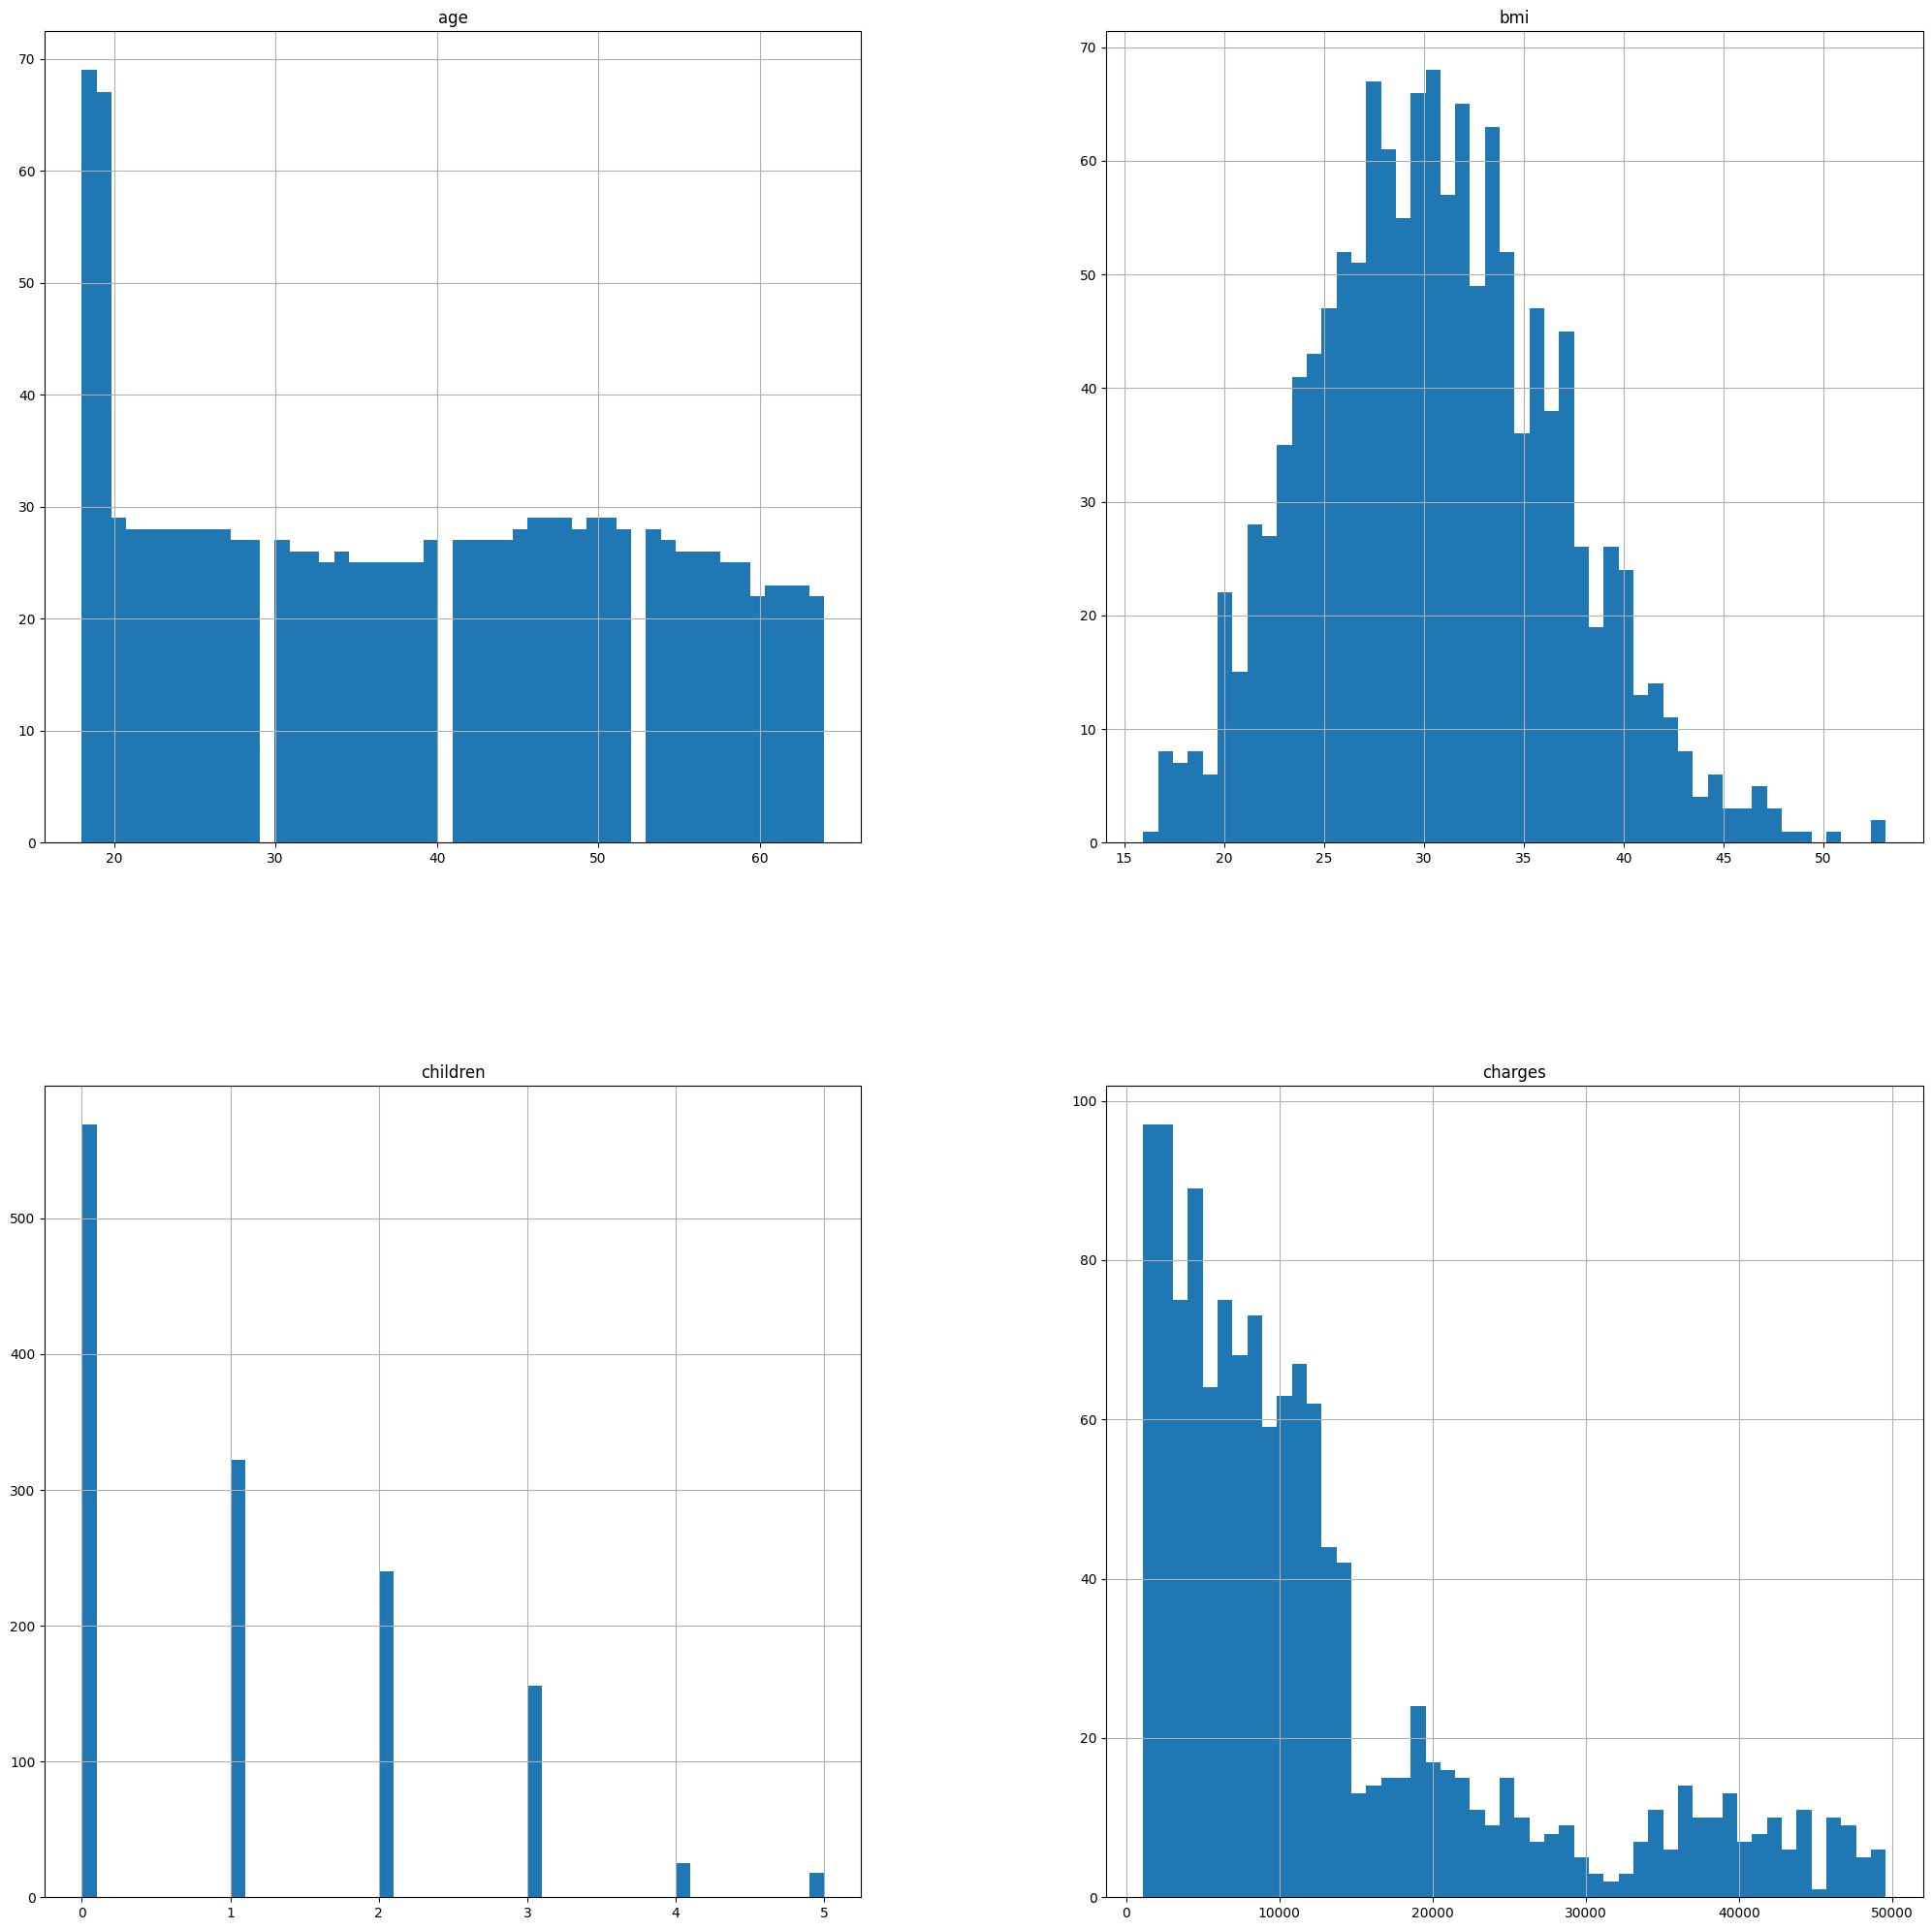

In [26]:
df_insure.hist(figsize=(25,25),bins=50)

Also, we can plot correlation values.

In [27]:
import numpy as np

<AxesSubplot:>

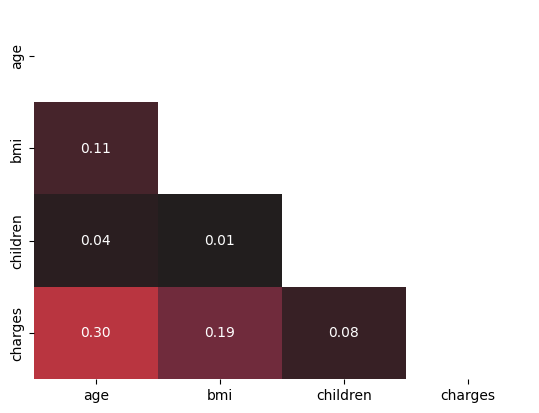

In [28]:
sns.heatmap(df_insure.corr(), vmin = -0.3, vmax = 0.6, center = 0, annot = True, fmt = ".2f",
            mask = ~np.tri(df_insure.corr().shape[1], k = -1, dtype = bool), cbar = False)

We can now conclude that the correlation between age and charges is low and insignificant in other variables. We'll plot the influence of catagorical variables and their distributions.

In [109]:
from statsmodels.distributions.empirical_distribution import ECDF

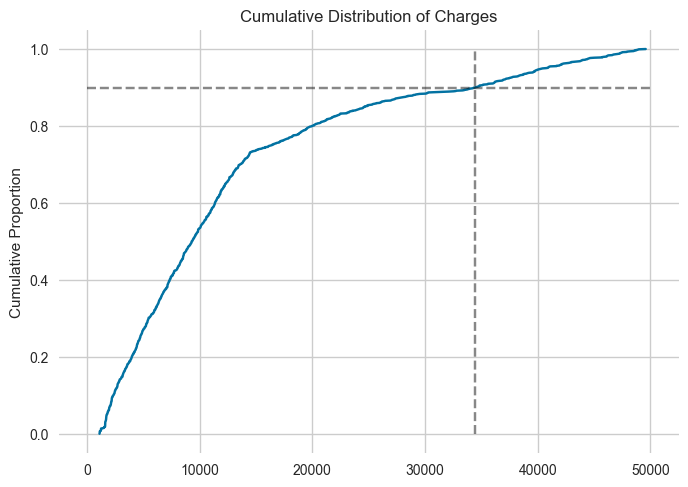

In [117]:
e = ECDF(df_insure.charges)
plt.subplot(1, 1, 1)
plt.plot(e.x, e.y)
plt.title("Cumulative Distribution of Charges")
plt.ylabel("Cumulative Proportion")
plt.plot([0, 50000], [0.9, 0.9], "k--", alpha=0.5)
plt.plot([df_insure.charges.quantile(.9), df_insure.charges.quantile(.9)], [0, 1], "k--", alpha=0.5)
plt.box(False)

In [29]:
# Create subsets
age = df_insure["age"]
sex = df_insure["sex"]
bmi = df_insure["bmi"]
children = df_insure["children"]
smoker = df_insure["smoker"]
region = df_insure["region"]
charges = df_insure["charges"]

Text(0.5, 1.0, 'Region Distribution')

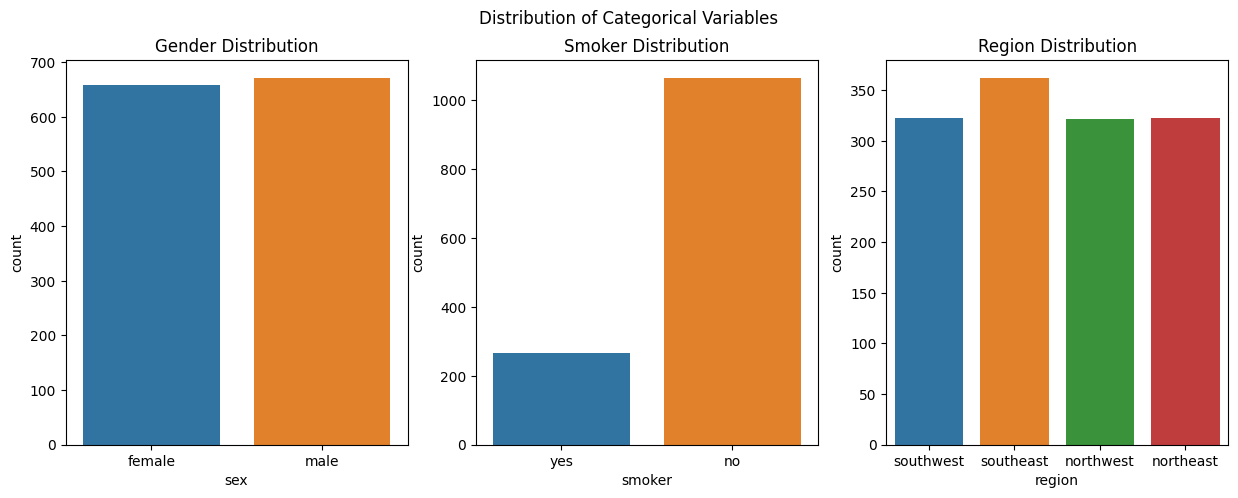

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Variables")

# Plot sex
sns.countplot(ax=axes[0], x=sex)
axes[0].set_title("Gender Distribution")

# Plot Smoker
sns.countplot(ax=axes[1], x=smoker)
axes[1].set_title("Smoker Distribution")

# Plot Region
sns.countplot(ax=axes[2], x=region)
axes[2].set_title("Region Distribution")

The number of males is slightly greater than the number of females; there are many non-smokers compared to smokers; most of the population is from the southeast region. We will now look at how each variable influences charges.

Text(0.5, 1.0, 'BMI vs Charges')

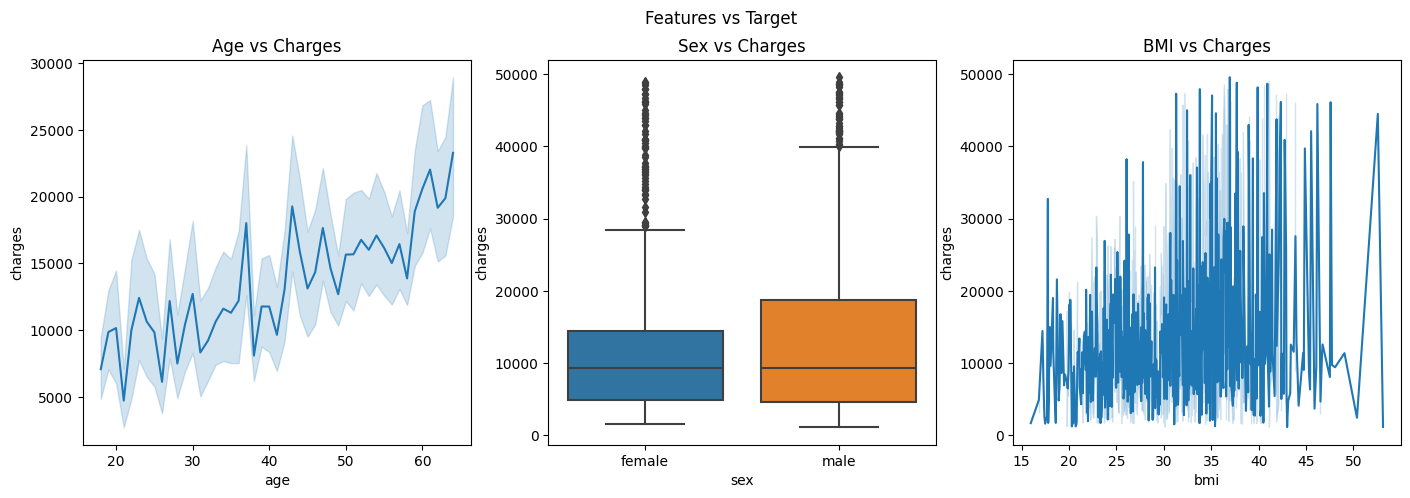

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle("Features vs Target")

# Plot age vs charges
sns.lineplot(ax=axes[0], x=age, y=charges)
axes[0].set_title("Age vs Charges")

# Plot sex vs charges
sns.boxplot(ax=axes[1], x=sex, y=charges)
axes[1].set_title("Sex vs Charges")

# Plot bmi vs charges
sns.lineplot(ax=axes[2], x=bmi, y=charges)
axes[2].set_title("BMI vs Charges")

Charges against the age variable show an upward trend, suggesting they rise with age. Males and female have the same median value of charges, however, the distribution of charges for males has a larger variance compared to females. BMI against charges upward trend seems to rise with the BMI index and plateaus between 35 - 40 indices, and then slightly falls from index 40 and above.

Text(0.5, 1.0, 'Region vs Charges')

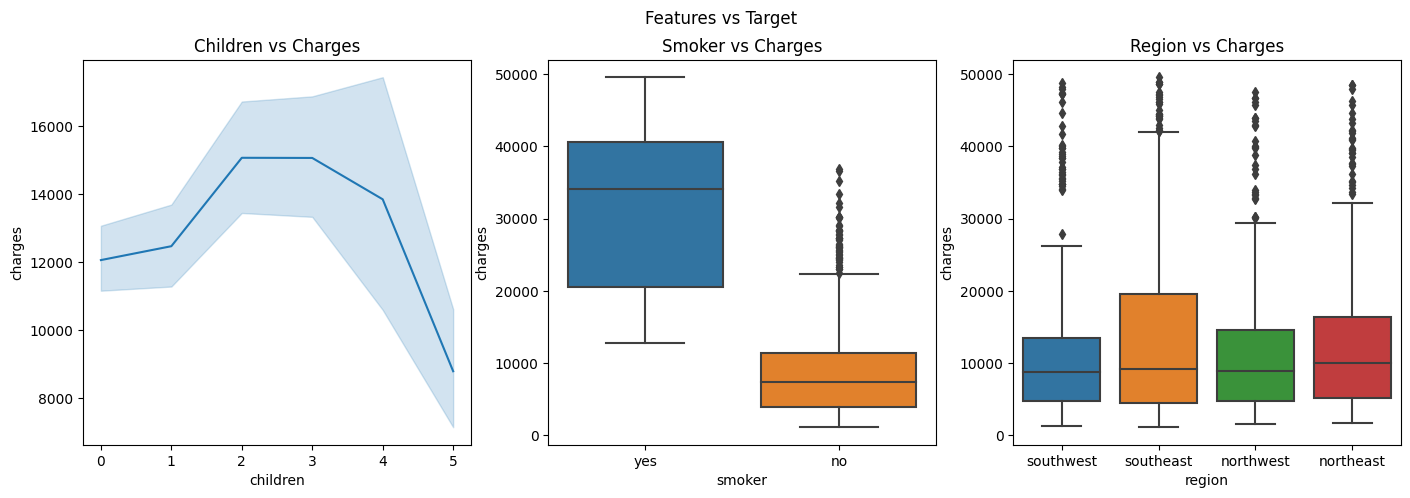

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle("Features vs Target")

# Plot children vs charges
sns.lineplot(ax=axes[0], x=children, y=charges)
axes[0].set_title("Children vs Charges")

# Plot smoker vs charges
sns.boxplot(ax=axes[1], x=smoker, y=charges)
axes[1].set_title("Smoker vs Charges")

# Plot region vs charges
sns.boxplot(ax=axes[2], x=region, y=charges)
axes[2].set_title("Region vs Charges")

Charges are higher for people with 2 - 3 children, and also higher for smokers. The charges for the northeast region is slightly higher compared to the other regions. This is shown by a slightly higher median. Therefore, the major drivers for charges are age and smokers.

#### Feature Encoding
Here we will change the representation of categorical variables to numeric.

In [33]:
df_insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [34]:
print("Original features:\n", list(df_insure.columns), "\n")
data_dummies = pd.get_dummies(df_insure[["age", "bmi", "children", "region", "charges"]])
data_dummies["sex"] = df_insure["sex"].apply(lambda x: 1 if x == "male" else 0)
data_dummies["smoker"] = df_insure["smoker"].apply(lambda x: 1 if x == "yes" else 0)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 

Features after get_dummies:
 ['age', 'bmi', 'children', 'charges', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex', 'smoker']


In [35]:
print(data_dummies.shape,"\n")
print(data_dummies.head())

(1330, 10) 

   age     bmi  children      charges  region_northeast  region_northwest  \
0   19  27.900         0  16884.92400                 0                 0   
1   18  33.770         1   1725.55230                 0                 0   
2   28  33.000         3   4449.46200                 0                 0   
3   33  22.705         0  21984.47061                 0                 1   
4   32  28.880         0   3866.85520                 0                 1   

   region_southeast  region_southwest  sex  smoker  
0                 0                 1    0       1  
1                 1                 0    1       0  
2                 1                 0    1       0  
3                 0                 0    1       0  
4                 0                 0    1       0  


#### Feature Standardisation
Numeric features need be standardised so that all numeric features are on the same scale.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaled_df = data_dummies.copy()
scaler = StandardScaler()
scaled_df[["age", "bmi", "children"]] = scaler.fit_transform(scaled_df[["age", "bmi", "children"]])
print(scaled_df.shape)
print(scaled_df.head())

(1330, 10)
        age       bmi  children      charges  region_northeast  \
0 -1.438072 -0.448866 -0.910496  16884.92400                 0   
1 -1.509261  0.515202 -0.081072   1725.55230                 0   
2 -0.797370  0.388740  1.577778   4449.46200                 0   
3 -0.441425 -1.302075 -0.910496  21984.47061                 0   
4 -0.512614 -0.287915 -0.910496   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  sex  smoker  
0                 0                 0                 1    0       1  
1                 0                 1                 0    1       0  
2                 0                 1                 0    1       0  
3                 1                 0                 0    1       0  
4                 1                 0                 0    1       0  


#### Feature Selection
Our objective here to extract the columns with all our features.

In [38]:
scaled_df.columns

Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker'],
      dtype='object')

In [39]:
features = scaled_df[["age", "bmi", "children", "region_northeast", "region_northwest",
                      "region_southeast", "region_southwest", "sex", "smoker"]]

# Extract NumPy arrays
X = features.values
y = scaled_df["charges"].values
print(f"X.shape: {X.shape} y.shape: {y.shape}")

X.shape: (1330, 9) y.shape: (1330,)


In [40]:
# Split data into train and test, 80 and 20, respectively
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Now, let's predict insurance charges.
#### Linear Regression

In [42]:
from sklearn import linear_model

In [43]:
# Linear regression object
reg = linear_model.LinearRegression()

In [44]:
# Fit inputs and output
reg_model = reg.fit(x_train, y_train)

In [45]:
# Predict
reg_pred = reg_model.predict(x_test)

#### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor()

In [48]:
tree_reg_model = tree_reg.fit(x_train, y_train)

In [49]:
tree_reg_pred = tree_reg_model.predict(x_test)

#### Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, reg_pred))}")
print(f"MAE: {mean_absolute_error(y_test, reg_pred)}")
print(f"R-squared: {r2_score(y_test, reg_pred)}")

RMSE: 5832.496449208681
MAE: 3992.959902058583
R-squared: 0.7592463982942959


In [53]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, tree_reg_pred))}")
print(f"MAE: {mean_absolute_error(y_test, tree_reg_pred)}")
print(f"R-squared: {r2_score(y_test, tree_reg_pred)}")

RMSE: 6141.840856171214
MAE: 2746.3830799586467
R-squared: 0.7330309322543664


The linear regressor gives a better score, and the Decision Tree Regressor gives a better MAE. Let's try to improve our model by feature engineering.

In [54]:
scores = {"Model": ["Linear", "Decision Trees"],
          "MAE": [mean_absolute_error(y_test, reg_pred), mean_absolute_error(y_test, tree_reg_pred)],
          "RMSE": [np.sqrt(mean_squared_error(y_test, reg_pred)), np.sqrt(mean_squared_error(y_test, tree_reg_pred))],
          "R^2": [r2_score(y_test, reg_pred), r2_score(y_test, tree_reg_pred)]}
pd.DataFrame(scores)

,Model,MAE,RMSE,R^2
0,Linear,3992.959902,5832.496449,0.759246
1,Decision Trees,2746.383080,6141.840856,0.733031


#### Feature Engineering
- Grouping customers sharing common characteristics
- 

In [55]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [56]:
data_dummies.columns

Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker'],
      dtype='object')

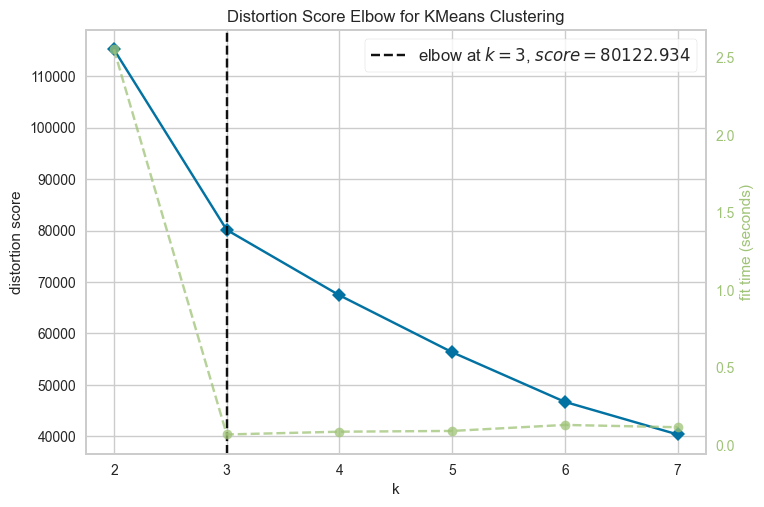

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# Get the features
features = data_dummies[["age", "bmi", "children", "region_northeast", "region_northwest",
                         "region_southeast", "region_southwest", "sex", "smoker"]]

# Instantiate the clustering model and visualiser
kmeans_model = KMeans()
visualiser = KElbowVisualizer(kmeans_model, k = (2, 8))

visualiser.fit(features)    # Fit the data to the visualiser
visualiser.show()           # Finalise and render the figure

The model fits best at 4 clusters

In [58]:
kmeans_object = KMeans(n_clusters = 3)
kmeans_model2 = kmeans_object.fit(features)

In [59]:
data_dummies["clusters"] = kmeans_model2.labels_
data_dummies.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker,clusters
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1
1,18,33.770,1,1725.55230,0,0,1,0,1,0,1
2,28,33.000,3,4449.46200,0,0,1,0,1,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,2
4,32,28.880,0,3866.85520,0,1,0,0,1,0,2


In [60]:
from scipy.stats import pointbiserialr

In [61]:
class Relation:
    """Returns correlations and p-values
    """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def rel(self):
        list = ["sex", "smoker", "region_northeast", "region_northwest", "region_southeast", "region_southwest", "clusters"]
        """For loop that iterates over categorical_v
        """
        for cat in self.dataset:
            if cat in list:
                print(cat, pointbiserialr(self.dataset[cat], self.dataset["charges"]))

In [62]:
corr = Relation(data_dummies)
corr.rel()

region_northeast PointbiserialrResult(correlation=0.01071237444146707, pvalue=0.6963034707226011)
region_northwest PointbiserialrResult(correlation=-0.042276519768511, pvalue=0.12330980730916045)
region_southeast PointbiserialrResult(correlation=0.07437614847651007, pvalue=0.006654747740302066)
region_southwest PointbiserialrResult(correlation=-0.045679035852775746, pvalue=0.09587701713365972)
sex PointbiserialrResult(correlation=0.058287161065017766, pvalue=0.033545530983047536)
smoker PointbiserialrResult(correlation=0.7856043852542784, pvalue=3.610865098696241e-279)
clusters PointbiserialrResult(correlation=-0.13747010963795628, pvalue=4.838297560909465e-07)


In [63]:
class FeatureEngineering:
    def __init__(self, dataset):
        self.dataset = dataset
    
    def north(self, ne, nw):
        if ((ne == 1) | (nw == 1)):
            return 1
        else:
            return 0
    
    def south(self, se, sw):
        if ((se == 1) | (sw == 1)):
            return 1
        else:
            return 0

In [64]:
class Clubbing(FeatureEngineering):
    def __init__(self, dataset):
        self.dataset = dataset
    
    def df(self):
        self.dataset["northerners"] = self.dataset.apply(lambda x: self.north(x["region_northeast"], x["region_northwest"]), axis=1)
        self.dataset["southerners"] = self.dataset.apply(lambda x: self.south(x["region_southeast"], x["region_southwest"]), axis=1)
        self.dataset["more_than_one_child"] = self.dataset["children"].apply(lambda x: 1 if x > 1 else 0)
        return self.dataset.head()

In [65]:
p = Clubbing(data_dummies)

In [66]:
p.df()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker,clusters,northerners,southerners,more_than_one_child
0,19,27.900,0,16884.92400,0,0,0,1,0,1,1,0,1,0
1,18,33.770,1,1725.55230,0,0,1,0,1,0,1,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0,1,0,1,0,1,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,2,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0,1,0,2,1,0,0


In [67]:
data_dummies.columns

Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker', 'clusters', 'northerners', 'southerners',
       'more_than_one_child'],
      dtype='object')

In [68]:
from scipy import stats

((array([-3.27891911, -3.01980425, -2.87559029, ...,  2.87559029,
          3.01980425,  3.27891911]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 48885.13561,
         48970.2476 , 49577.6624 ])),
 (10603.658319082728, 13045.345009390227, 0.9047076615609589))

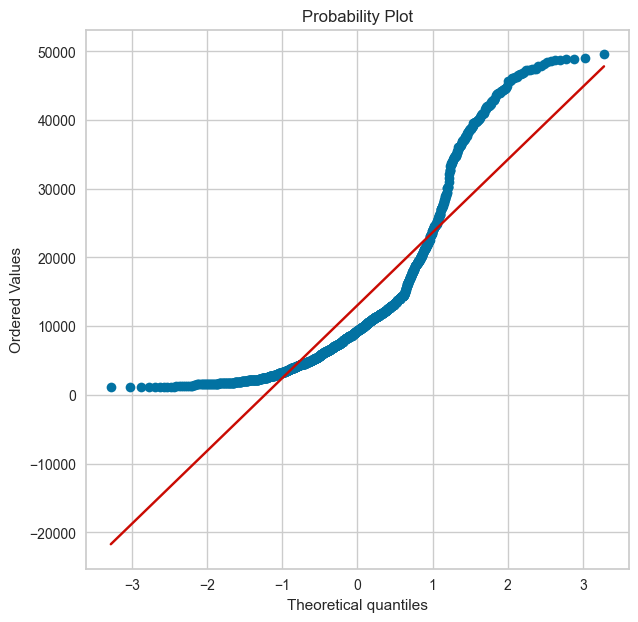

In [69]:
plt.figure(figsize=(7,7))
stats.probplot(data_dummies["charges"], dist="norm", plot=plt)

((array([-3.27891911, -3.01980425, -2.87559029, ...,  2.87559029,
          3.01980425,  3.27891911]),
  array([ 7.02275569,  7.0313053 ,  7.0352164 , ..., 10.79722865,
         10.7989682 , 10.81129566])),
 (0.9048629267862978, 9.090138389317305, 0.9913788892984353))

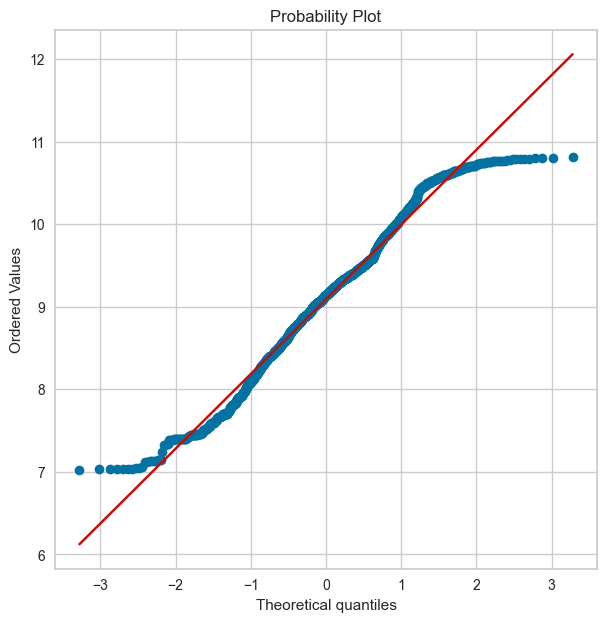

In [70]:
plt.figure(figsize=(7,7))
stats.probplot(np.log(data_dummies["charges"]), dist="norm", plot=plt)

((array([-3.27891911, -3.01980425, -2.87559029, ...,  2.87559029,
          3.01980425,  3.27891911]),
  array([ 33.4943861 ,  33.63787449,  33.70371938, ..., 221.09983177,
         221.29222219, 222.66041947])),
 (45.394359561601654, 104.1704910413635, 0.9670692968504822))

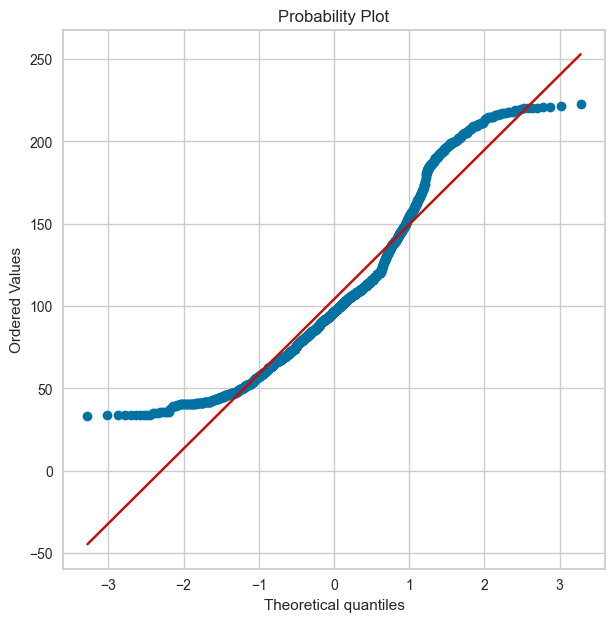

In [71]:
plt.figure(figsize=(7,7))
stats.probplot(np.sqrt(data_dummies["charges"]), dist="norm", plot=plt)

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression

In [73]:
data_dummies.columns

Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker', 'clusters', 'northerners', 'southerners',
       'more_than_one_child'],
      dtype='object')

In [74]:
features = data_dummies[["age", "bmi", "clusters", "sex", "smoker",
                         "northerners", "southerners", "more_than_one_child"]]
target = data_dummies["charges"]
print(f"Feature dimension: {features.shape}")

Feature dimension: (1330, 8)


In [75]:
select = SelectKBest(score_func=f_regression, k=7)
z = select.fit_transform(features, target)
print(f"After selecting best 7 features: {z.shape}")

After selecting best 7 features: (1330, 7)


In [76]:
# Identify the selected features
data = select.get_support(indices=True)
features_new = features.iloc[:, data]

print(f"Best 7 features:\n\n{features_new.columns}")

Best 7 features:

Index(['age', 'bmi', 'clusters', 'sex', 'smoker', 'southerners',
       'more_than_one_child'],
      dtype='object')


In [77]:
features_new[0:2]

,age,bmi,clusters,sex,smoker,southerners,more_than_one_child
0,19,27.90,1,0,1,1,0
1,18,33.77,1,1,0,1,0


In [78]:
# Table for metrics
metrics = pd.DataFrame()
Model = []
RMSE = []
MAE = []
R_Squared = []

In [79]:
# Extracting dependant and independent variables
y = data_dummies["charges"].values
X = data_dummies[["age", "bmi", "clusters", "sex", "smoker", "southerners", "more_than_one_child"]]

In [80]:
#Split test and train data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()
X_train[["age", "bmi"]] = scaler.fit_transform(X_train[["age", "bmi"]])
X_test[["age", "bmi"]] = scaler.fit_transform(X_test[["age", "bmi"]])

In [82]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [83]:
reg_model2 = linear_model.LinearRegression()
reg_trans = TransformedTargetRegressor(regressor=reg_model2, transformer=QuantileTransformer(output_distribution="normal"))
reg_trans_fit = reg_trans.fit(X_train, y_train)
reg_trans_pred = reg_trans_fit.predict(X_test)

In [84]:
tree_reg_2 = DecisionTreeRegressor()
reg_trans_2 = TransformedTargetRegressor(regressor=tree_reg_2, transformer=QuantileTransformer(output_distribution="normal"))
reg_trans_2_fit = reg_trans_2.fit(X_train, y_train)
reg_trans_2_pred = reg_trans_2_fit.predict(X_test)

In [85]:
# Regression Model Validation
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, reg_trans_pred)), 2)}")
print(f"MAE : {round(mean_absolute_error(y_test, reg_trans_pred), 2)}")
print(f"R-squared: {round(r2_score(y_test, reg_trans_pred), 3)}\n")

#DecisionTreeRegressor Model Validation
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, reg_trans_2_pred)), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, reg_trans_2_pred), 2)}")
print(f"Q-squared: {round(r2_score(y_test, reg_trans_2_pred), 3)}")

RMSE: 7248.19
MAE : 3948.77
R-squared: 0.627

RMSE: 6695.96
MAE: 3280.97
Q-squared: 0.681


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [87]:
polyF = PolynomialFeatures(degree=3)
X_train_poly = polyF.fit_transform(X_train)
X_test_poly = polyF.fit_transform(X_test)

In [88]:
rmf_reg = RandomForestRegressor()
trans = TransformedTargetRegressor(regressor=rmf_reg, transformer=QuantileTransformer(output_distribution="normal"))
rmf_fit = trans.fit(X_train_poly, y_train)
rmf_pred = rmf_fit.predict(X_test_poly)

In [89]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rmf_pred))}")
print(f"MAE: {mean_absolute_error(y_test, rmf_pred)}")
print(f"R-squared: {r2_score(y_test, rmf_pred)}")

RMSE: 4786.933394475405
MAE: 2427.6873331746356
R-squared: 0.8371377132494553


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

In [91]:
def model_boost(x):
    """Generic function to fit model and return metrics for every algorithm"""
    # Transformingtarget variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution="normal"))
    regr_fit = regr_trans.fit(X_train, y_train)
    regr_pred = regr_fit.predict(X_test)
    algoname = x.__class__.__name__
    return algoname, round(r2_score(y_test, regr_pred), 3), round(mean_absolute_error(y_test, regr_pred), 2), round(np.sqrt(mean_squared_error(y_test, regr_pred)), 2)

In [92]:
algo = [GradientBoostingRegressor(), lgb.LGBMRegressor(), xgb.XGBRFRegressor()]
score = []
for a in algo:
    score.append(model_boost(a))
# Collate all scores in a table
pd.DataFrame(score, columns=["Model", "Score", "MAE", "RMSE"])

,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.857,2155.03,4482.33
1,LGBMRegressor,0.854,2320.81,4537.81
2,XGBRFRegressor,0.863,2060.31,4394.33


#### Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter_grid = {"n_estimators": [100, 80, 60, 50, 45],
                  "max_depth": [3, 4, 5, 6],
                  "learning_rate": [0.2, 0.15]}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_grid, refit = True, verbose = 3, n_jobs = -1)
reg_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution="normal"))

# Fitting the model for grid search
grid_result = reg_trans.fit(X_train, y_train)
best_param = grid_result.regressor_.best_params_
print(best_param)

# Using best params to create and fit model
best_model = xgb.XGBRFRegressor(max_depth=best_param["max_depth"], n_estimators=best_param["n_estimators"], reg_lambda=best_param["learning_rate"])
reg_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_trans.predict(X_test)

# Evaluate metrics
r2_score(y_test, reg_pred), mean_absolute_error(y_test, reg_pred), np.sqrt(mean_squared_error(y_test, reg_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 45}


(0.860866003881413, 2245.648395090167, 4424.495420637621)

In [95]:
parameter_grid = {"n_estimators": [100, 80, 60, 50, 45],
                  "max_depth": [3, 4, 5, 6],
                  "num_leaves": [9, 10, 11, 12]}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_grid, refit = True, verbose = 3, n_jobs = -1)
reg_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution="normal"))

# Fitting the model for grid search
grid_result = reg_trans.fit(X_train, y_train)
best_param = grid_result.regressor_.best_params_
print(best_param)

# Using best params to create and fit model
best_model = xgb.XGBRFRegressor(max_depth=best_param["max_depth"], n_estimators=best_param["n_estimators"], reg_lambda=best_param["num_leaves"])
reg_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_trans.predict(X_test)

# Evaluate metrics
r2_score(y_test, reg_pred), mean_absolute_error(y_test, reg_pred), np.sqrt(mean_squared_error(y_test, reg_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'max_depth': 4, 'n_estimators': 50, 'num_leaves': 9}


(0.8527606650949558, 2385.5071975931037, 4551.5471294503095)

In [96]:
parameter_grid = {"n_estimators": [100, 80, 60, 50, 45],
                  "max_depth": [None, 3, 4, 5, 6]}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_grid, refit = True, verbose = 3, n_jobs = -1)
reg_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution="normal"))

# Fitting the model for grid search
grid_result = reg_trans.fit(X_train, y_train)
best_param = grid_result.regressor_.best_params_
print(best_param)

# Using best params to create and fit model
best_model = xgb.XGBRFRegressor(max_depth=best_param["max_depth"], n_estimators=best_param["n_estimators"])
reg_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_trans.predict(X_test)

# Evaluate metrics
r2_score(y_test, reg_pred), mean_absolute_error(y_test, reg_pred), np.sqrt(mean_squared_error(y_test, reg_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'max_depth': 3, 'n_estimators': 50}


(0.8614688491059534, 2235.8088801773965, 4414.899701703585)

In [97]:
parameter_grid = {"n_estimators": [100, 80, 60, 50, 45],
                  "max_depth": [3, 4, 5, 6],
                  "reg_lambda": [0.26, 0.25, 0.2]}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_grid, refit = True, verbose = 3, n_jobs = -1)
reg_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution="normal"))

# Fitting the model for grid search
grid_result = reg_trans.fit(X_train, y_train)
best_param = grid_result.regressor_.best_params_
print(best_param)

# Using best params to create and fit model
best_model = xgb.XGBRFRegressor(max_depth=best_param["max_depth"], n_estimators=best_param["n_estimators"], reg_lambda=best_param["reg_lambda"])
reg_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_trans.predict(X_test)

# Evaluate metrics
r2_score(y_test, reg_pred), mean_absolute_error(y_test, reg_pred), np.sqrt(mean_squared_error(y_test, reg_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 0.25}


(0.8610168149291435, 2241.1125590660245, 4422.096856222278)

In [99]:
model = RandomForestRegressor(n_estimators = 120)

reg_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_fit.predict(X_test)

Model.append("RandomForestRegressor")
RMSE.append(round(np.sqrt(mean_squared_error(y_test, reg_pred)), 3))
MAE.append(round(mean_absolute_error(y_test, reg_pred), 3))
R_Squared.append(round(r2_score(y_test, reg_pred), 3))

In [100]:
model = xgb.XGBRFRegressor(n_estimators = 51, max_depth = 7, reg_lambda = 0.26)

reg_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_fit.predict(X_test)

Model.append("XGBoost Regression")
RMSE.append(round(np.sqrt(mean_squared_error(y_test, reg_pred)), 3))
MAE.append(round(mean_absolute_error(y_test, reg_pred), 3))
R_Squared.append(round(r2_score(y_test, reg_pred), 3))

In [103]:
model = lgb.LGBMRegressor(n_estimators = 50, max_depth = 5, num_leaves=10)
reg_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution="normal"))
reg_fit = reg_trans.fit(X_train, y_train)
reg_pred = reg_fit.predict(X_test)

Model.append("Light GBM Regression")
RMSE.append(round(np.sqrt(mean_squared_error(y_test, reg_pred)), 3))
MAE.append(round(mean_absolute_error(y_test, reg_pred), 3))
R_Squared.append(round(r2_score(y_test, reg_pred), 3))

#### Metrics Table

In [105]:
metrics["Model"] = Model
metrics["RMSE"] = RMSE
metrics["MAE"] = MAE
metrics["R_Squared"] = R_Squared
metrics = metrics.drop([3], axis=0)
metrics

,Model,RMSE,MAE,R_Squared
0,RandomForestRegressor,4608.268,2254.938,0.849
1,XGBoost Regression,4469.260,2184.058,0.858
2,Light GBM Regression,4356.887,2107.171,0.865


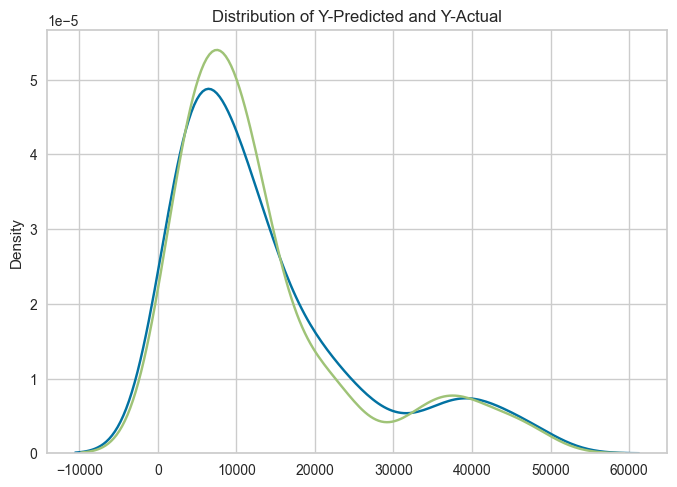

In [107]:
plt.title("Distribution of Y-Predicted and Y-Actual")
axis = sns.distplot(y_test, hist=False)
sns.distplot(reg_pred, hist=False, ax=axis)
plt.show()

<AxesSubplot:>

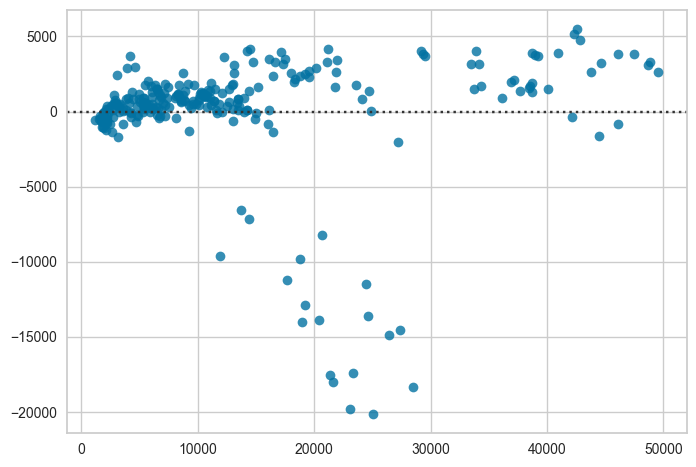

In [108]:
sns.residplot(y_test, reg_pred)